In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
df= pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Selecting target (e.g., Pass/Fail using threshold on scores) :**

In [6]:
df["avg_score"]= df[["math score","reading score", "writing score"]].mean(axis=1)
df["Pass_fail"]= df["avg_score"].apply(lambda x:1 if x>=50 else 0)

In [ ]:
df.head()

In [7]:
x= df.drop(["avg_score","Pass_fail"],axis=1)
y= df["Pass_fail"]

In [8]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [9]:
x["gender"]=df["gender"].map({"male":0,"female":1})
x["race/ethnicity"]= le.fit_transform(x["race/ethnicity"])
x["parental level of education"]= le.fit_transform(x["parental level of education"])
x["lunch"]=le.fit_transform(x["lunch"])
x["test preparation course"]= le.fit_transform(x["test preparation course"])

In [10]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,1,1,1,72,72,74
1,1,2,4,1,0,69,90,88
2,1,1,3,1,1,90,95,93
3,0,0,0,0,1,47,57,44
4,0,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,1,4,3,1,0,88,99,95
996,0,2,2,0,1,62,55,55
997,1,2,2,0,0,59,71,65
998,1,3,4,1,0,68,78,77


**TRAINING LOGISTIC REGRESSION MODEL :**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [12]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
model= LogisticRegression()

In [13]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
x_train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
29,1,3,3,1,1,62,70,75
535,1,2,1,0,0,66,83,83
695,1,3,4,0,1,79,89,86
557,0,2,3,0,1,61,67,66
836,0,4,2,1,1,73,64,57


In [15]:
y_pred= model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

**EVALUATING using Accuracy :**

In [16]:
log_accuracy= accuracy_score(y_test,y_pred)
log_accuracy

0.975

**EVALUATING using Precision :**

In [17]:
log_precision= precision_score(y_test,y_pred)
log_precision

0.9772727272727273

**EVALUATING using Confusion Matrix:**

In [18]:
log_confusion_m= confusion_matrix(y_test, y_pred)
log_confusion_m

array([[ 23,   4],
       [  1, 172]])

**TRAINING DECISION TREE MODEL :**

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state= 42)

In [20]:
dt.fit(x_train,y_train)
print("Decision Tree Model has been trained")

Decision Tree Model has been trained


In [21]:
from sklearn.metrics import accuracy_score
dt.pred= dt.predict(x_test)


**EVALUATING using Accuracy :**

In [22]:
dt_accuracy= accuracy_score(y_test,dt.pred)
dt_accuracy

0.985

**Plotting Decision Tree :**

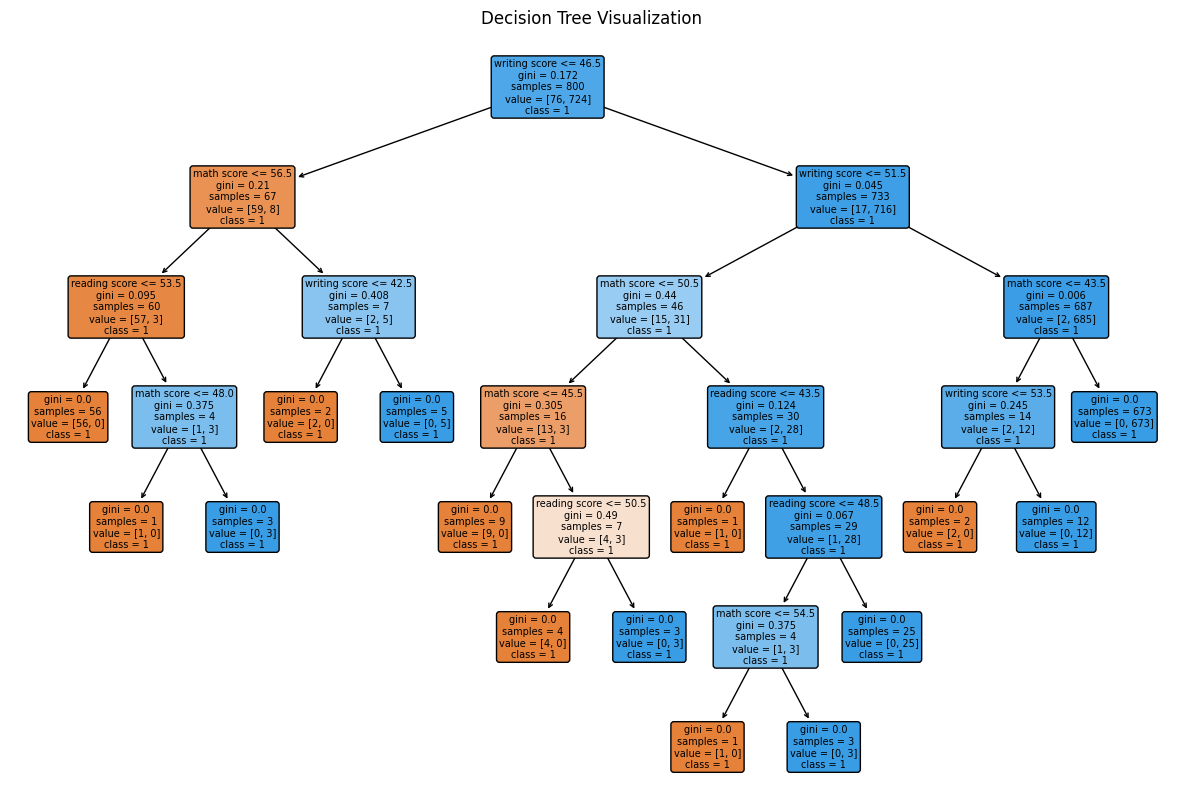

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plot_tree(dt,feature_names=x.columns, class_names=y.astype(str), filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

**EVALUATING using Precision:**

In [24]:
dt_precision = precision_score(y_test,dt.pred)
dt_precision

0.9885057471264368

**EVALUATING using Confusion Matrix:**

In [25]:
dt_conf_m= confusion_matrix(y_test,dt.pred)
dt_conf_m

array([[ 25,   2],
       [  1, 172]])

**Explaining how certain features affect Performance using SHAP values:**

In [26]:
X_new = x.drop(['math score', 'reading score', 'writing score'], axis=1)
y_new = df['Pass_fail']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Split the new feature set and target into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42, stratify=y_new
)

# 2. Instantiate a RandomForestClassifier
model_new = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Train the model on the new training data
model_new.fit(X_train_new, y_train_new)

# 4. Calculate and print the accuracy
accuracy_new = accuracy_score(y_test_new, model_new.predict(X_test_new))
print(f"Accuracy of the retrained model: {accuracy_new:.2f}")

Accuracy of the retrained model: 0.88


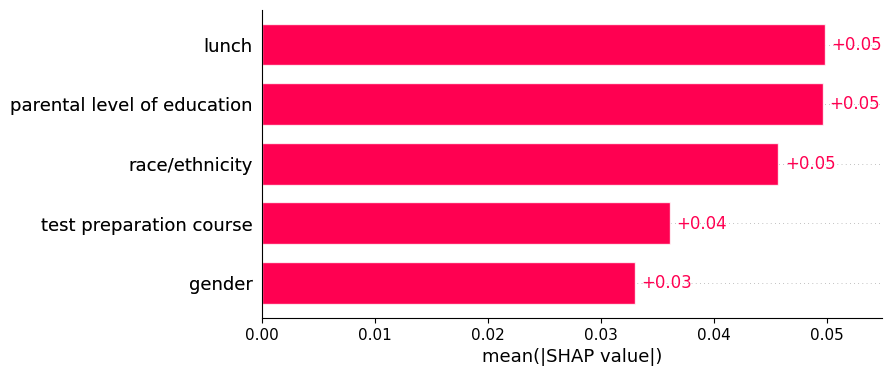

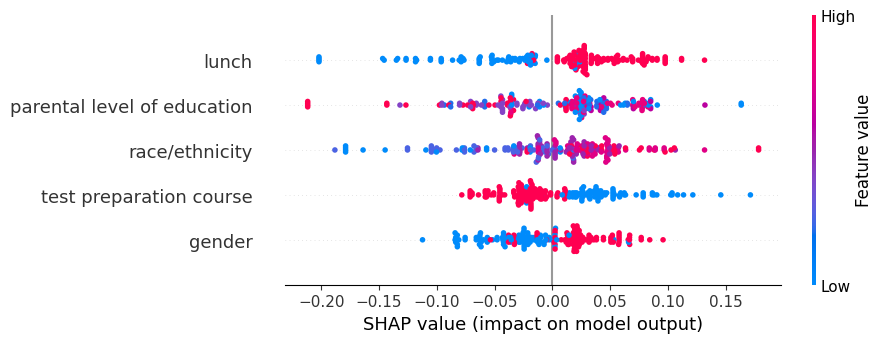

In [28]:
import shap

shap.initjs()
explainer_new = shap.Explainer(model_new, X_train_new)
shap_values_new = explainer_new(X_test_new)

shap.plots.bar(shap_values_new[:,:,1], max_display=len(X_new.columns))
shap.plots.beeswarm(shap_values_new[:,:,1])

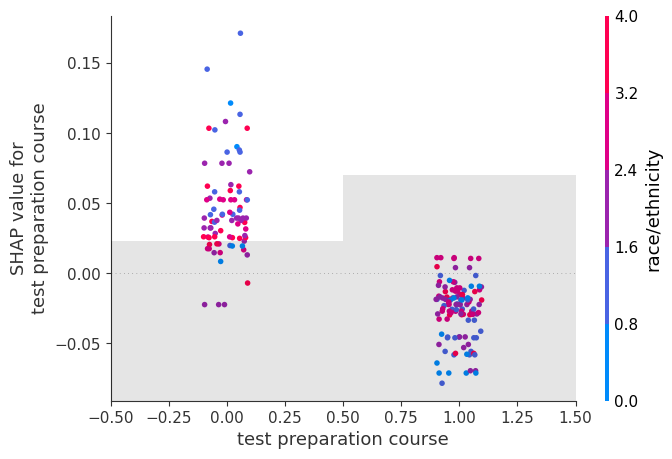

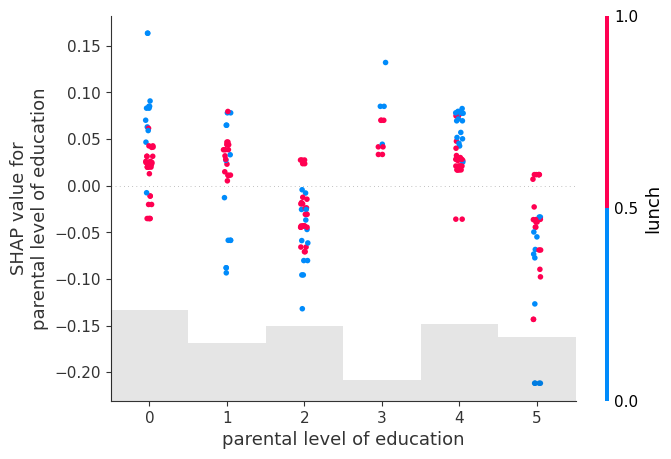

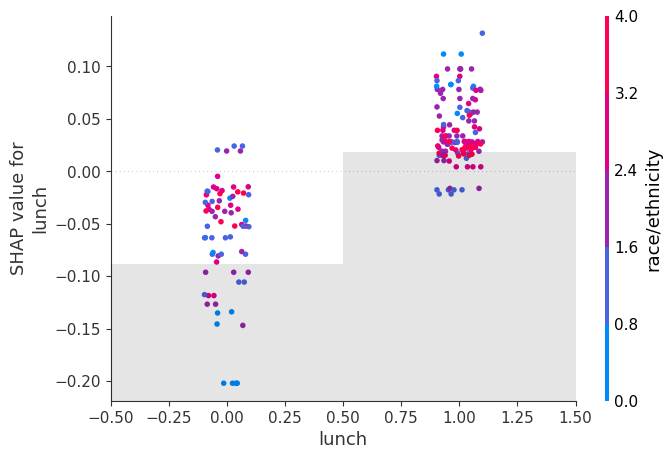

In [29]:
import shap

# Generate SHAP dependence plots for the top 3 features
top_features = ['test preparation course', 'parental level of education', 'lunch']

for feature in top_features:
    shap.plots.scatter(shap_values_new[:, feature, 1], color=shap_values_new[:,:,1])

**ANALYSIS OF ABOVE PLOTS :**

A dependence plot shows the relationship between a single feature and its SHAP value for all data points. This will give us a more direct visualization of how each feature's value impacts the model's output.

In short, this code block trains a Random Forest model and then uses various techniques to understand which features are most important for predicting student performance and how they influence the model's predictions.



This is a much more realistic and useful model because it's predicting performance based on factors that are known before the test scores are available.

As a result, the SHAP plots for the corrected model show the true influence of these features on the prediction, which is why "test preparation course," "parental level of education," and "lunch" now appear as the most important.

They allow us to confidently say that factors like completing the test preparation course, having parents with a higher level of education, and having a standard lunch are all significant predictors of a student's success, according to our model.